In [3]:
import numpy as np
from numpy import pi
import time
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
import quantumaudio as qa
import scipy as sp
from supercollider import Server, Buffer, Synth

# Functions

In [35]:
# Statistical acceleration
def time_array(first_ch_len, last_ch_len, size):
    decrement = (first_ch_len/last_ch_len)**(1/(size))
    time_array = []
    for i in range(size):
        time_array.append(last_ch_len**(decrement**i))
    return time_array

def add_r_sqpam(qa, angle1, angle2, shots=10000):
    qa.prepare()
    qa.circuit.r(angle1, angle2, 0)
    qa.measure()
    qa.run(shots).reconstruct_audio()
    return qa.output

def add_ry_sqpam(qa, angle, shots=10000):
    qa.prepare()
    qa.circuit.ry(angle, 0)
    qa.measure()
    qa.run(shots).reconstruct_audio()
    return qa.output

def add_rx_sqpam(qa, angle, shots=10000):
    qa.prepare()
    qa.circuit.ry(angle, 0)
    qa.measure()
    qa.run(shots).reconstruct_audio()
    return qa.output

def plot_out(out, color='darkblue'):
    plt.figure()
    plt.plot(out, color)
    plt.show()
    plt.close()

def linear_image(input_list, output_min, output_max):
    input_min = min(input_list)
    input_max = max(input_list)
    linear_image_list = [(x - input_min) / (input_max - input_min) * (output_max - output_min) + output_min for x in input_list]
    return linear_image_list

def harmonicseries(fund, scaling = 1, exponent = 1, freq_shift = 0, num = 10, n = 24, A4 = 440):
    harmonic = []
    for x in np.arange(1,num+1):
        harmonic.append((fund*((np.abs(scaling)*(x-1)+1)**exponent)+freq_shift))
    return harmonic

def toWavetable(signal):
    wavetable = np.zeros(2*len(signal))
    wavetable[0::2] = 2*signal - np.roll(signal, -1)
    wavetable[1::2] = np.roll(signal, -1) - signal
    return wavetable

def updateBuffer (buffer, signal):
    wavetableformat = toWavetable(signal)
    buffer.set(signal)#wavetableformat)

<Figure size 2000x500 with 0 Axes>

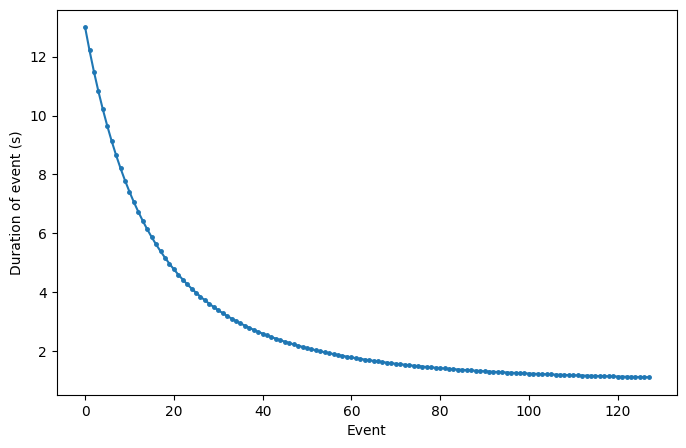

In [5]:
qubit_size = 7
table_size = 2**qubit_size
t = np.linspace(0.01, 1-1/table_size, table_size)
log_time = time_array(0.55, 13, 128)
plt.figure(figsize=(20,5))
plt.figure(figsize=(8,5))
plt.plot(linear_image(t,0,127), log_time, '.-', ms=5)
plt.ylabel('Duration of event (s)')
plt.xlabel('Event')
#plt.savefig('plot.png', dpi=500)
plt.show()

Total time in minutes

In [6]:
np.sum(log_time)/60

6.122652568960797

## QPAM representation

In [7]:
qlog_time = qa.QuantumAudio('qpam').load_input(log_time)

For this input, the QPAM representation will require:
         7 qubits for encoding time information and 
         0 qubits for encoding ampĺitude information.


In [8]:
qlog_time.prepare().measure()
# qlog_time.circuit.draw('mpl')

QuantumAudio

### Simulate

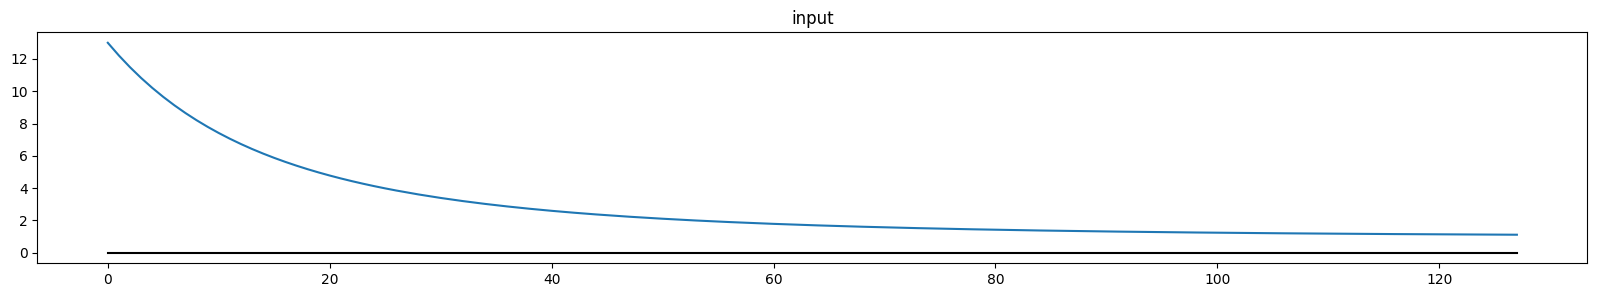

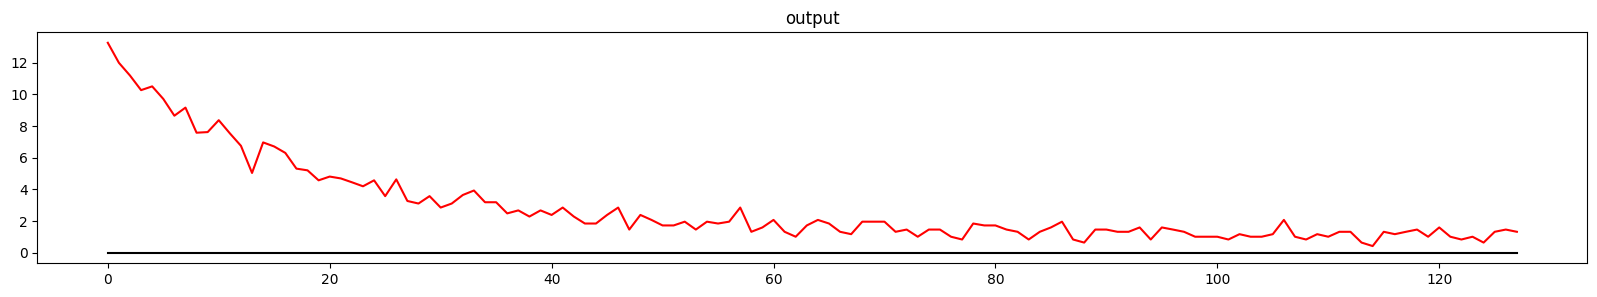

In [9]:
shots = 1024*4
wavetable = qlog_time.run(shots).reconstruct_audio().output
qlog_time.plot_audio()

Save output

In [10]:
log_wave = qlog_time.reconstruct_audio().output

In [11]:
# After several trials, this time array is used for the composition

log_wave7 = [12.88, 11.97, 11.68, 10.03, 10.3 ,  9.56,  9.37,  8.93,  7.93,
        7.22,  6.84,  6.76,  6.44,  6.76,  6.07,  6.84,  5.42,  5.31,
        5.88,  5.42,  5.15,  4.45,  4.39,  3.65,  4.13,  3.86,  3.65,
        3.19,  3.35,  3.27,  3.79,  3.11,  3.03,  3.19,  3.11,  2.58,
        3.72,  2.49,  2.49,  2.77,  3.03,  2.18,  2.77,  3.03,  2.39,
        1.96,  1.96,  2.18,  2.39,  2.68,  2.08,  2.18,  1.73,  2.18,
        2.77,  2.39,  2.18,  1.47,  1.6 ,  1.85,  1.6 ,  1.6 ,  1.85,
        2.18,  1.96,  1.73,  1.33,  0.84,  1.01,  0.64,  1.47,  1.47,
        1.96,  1.47,  1.85,  1.96,  2.29,  1.47,  1.6 ,  1.18,  2.18,
        1.47,  0.84,  1.01,  1.73,  1.85,  1.85,  1.96,  1.33,  1.6 ,
        2.18,  1.18,  0.84,  0.42,  2.29,  1.33,  0.42,  1.01,  1.33,
        0.84,  0.42,  0.42,  1.47,  1.47,  1.73,  1.18,  0.42,  1.47,
        1.6 ,  0.84,  0.84,  1.47,  0.84,  1.73,  1.47,  1.33,  1.33,
        1.18,  1.18,  0.64,  1.6 ,  1.01,  1.33,  1.33,  0.42,  1.18,
        1.6 ,  0.84]

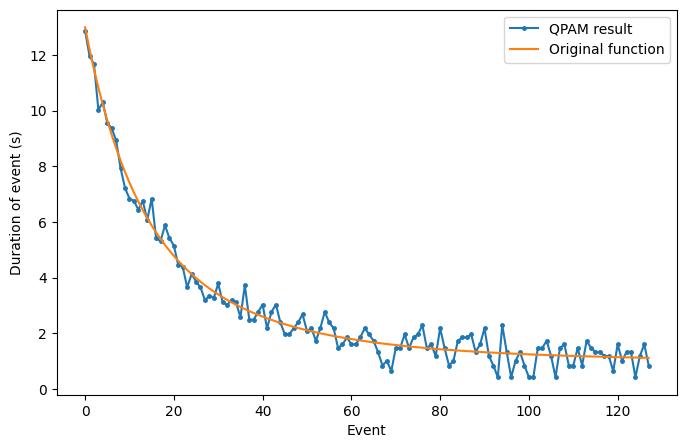

In [12]:
t = np.linspace(0.01, 1-1/table_size, table_size)
plt.figure(figsize=(8,5))
plt.plot(linear_image(t,0,127), log_wave7, '.-', ms=5, label='QPAM result')
plt.ylabel('Duration of event (s)')
plt.xlabel('Event')


qubit_size = 7
table_size = 2**qubit_size
t = np.linspace(0.01, 1-1/table_size, table_size)
log_time = time_array(0.55, 13, 128)
plt.plot(linear_image(t,0,127), log_time, '-', ms=5, label='Original function')

plt.legend()
# plt.savefig('plot.png', dpi=1000)
plt.show()

plt.show()

## Spectral exponent

In [17]:
# Spectral compression
# The interval from 1 to 0 will later be converted to the desired interval for the exponents
exponent = np.linspace(1,0,128)
exponent

array([1.        , 0.99212598, 0.98425197, 0.97637795, 0.96850394,
       0.96062992, 0.95275591, 0.94488189, 0.93700787, 0.92913386,
       0.92125984, 0.91338583, 0.90551181, 0.8976378 , 0.88976378,
       0.88188976, 0.87401575, 0.86614173, 0.85826772, 0.8503937 ,
       0.84251969, 0.83464567, 0.82677165, 0.81889764, 0.81102362,
       0.80314961, 0.79527559, 0.78740157, 0.77952756, 0.77165354,
       0.76377953, 0.75590551, 0.7480315 , 0.74015748, 0.73228346,
       0.72440945, 0.71653543, 0.70866142, 0.7007874 , 0.69291339,
       0.68503937, 0.67716535, 0.66929134, 0.66141732, 0.65354331,
       0.64566929, 0.63779528, 0.62992126, 0.62204724, 0.61417323,
       0.60629921, 0.5984252 , 0.59055118, 0.58267717, 0.57480315,
       0.56692913, 0.55905512, 0.5511811 , 0.54330709, 0.53543307,
       0.52755906, 0.51968504, 0.51181102, 0.50393701, 0.49606299,
       0.48818898, 0.48031496, 0.47244094, 0.46456693, 0.45669291,
       0.4488189 , 0.44094488, 0.43307087, 0.42519685, 0.41732

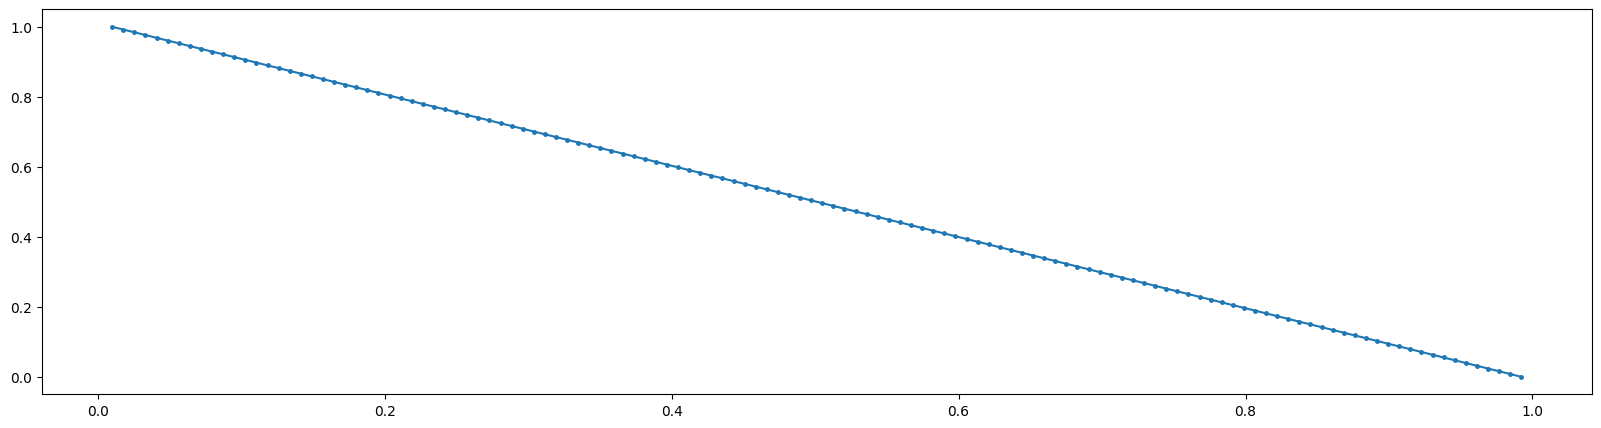

In [18]:
qubit_size = 7
table_size = 2**qubit_size
t = np.linspace(0.01, 1-1/table_size, table_size)
plt.figure(figsize=(20,5))
plt.plot(t, exponent, '.-', ms=5)
plt.show()

### QPAM representation

In [21]:
qharmonic = qa.QuantumAudio('qpam').load_input(exponent)

For this input, the QPAM representation will require:
         7 qubits for encoding time information and 
         0 qubits for encoding ampĺitude information.


In [22]:
qharmonic.prepare().measure()
# qharmonic.circuit.draw('mpl')

QuantumAudio

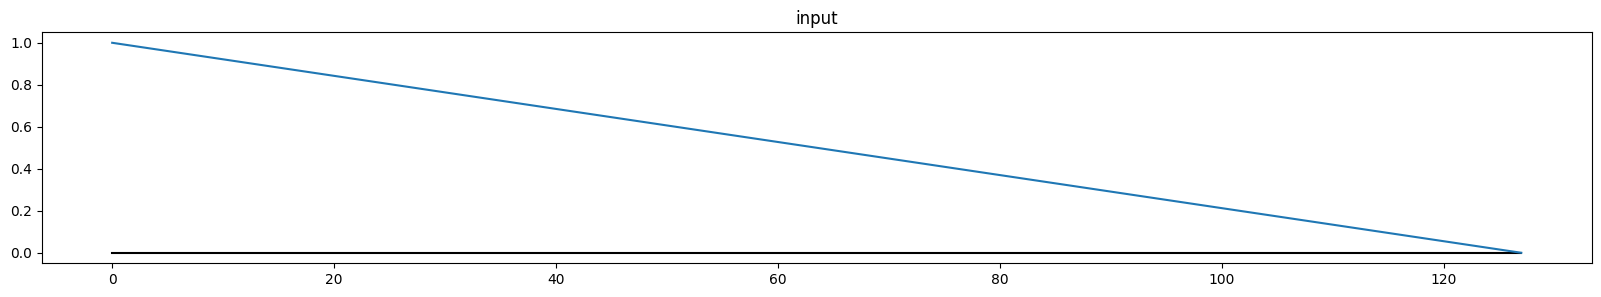

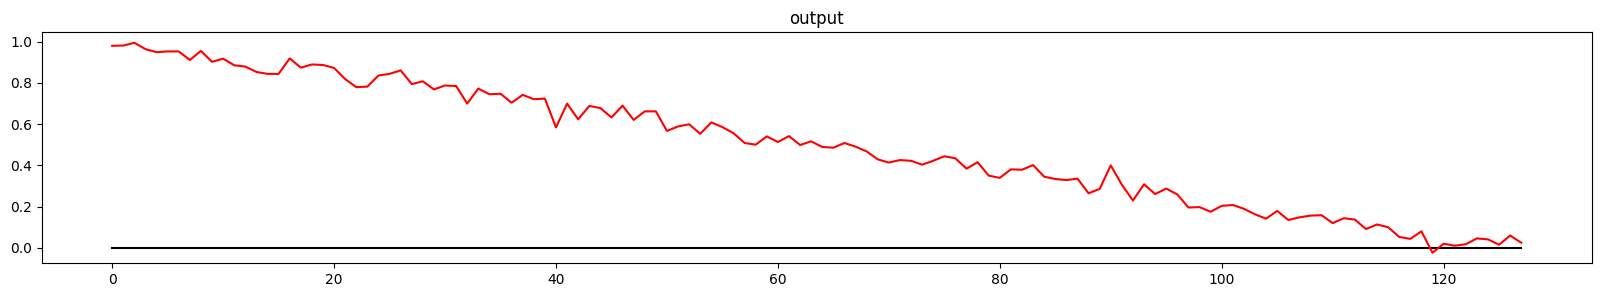

In [23]:
shots = 1024*12*5
wavetable = qharmonic.run(shots).reconstruct_audio().output
qharmonic.plot_audio()

Save output

In [ ]:
harmonic_wave = qharmonic.reconstruct_audio().output

In [28]:
# After several trials, this time array is used for the composition

harmonic_wave = [ 1.        ,  0.99585062,  0.9916318 ,  0.98731501,  0.97113402,
        0.958159  ,  0.92734226,  0.9626556 ,  0.93172691,  0.93043478,
        0.93522267,  0.90707071,  0.90829694,  0.91983122,  0.87550201,
        0.86609071,  0.86259542,  0.82869379,  0.884     ,  0.83884298,
        0.83850932,  0.83967936,  0.83870968,  0.83296703,  0.8426501 ,
        0.74595843,  0.84051724,  0.8       ,  0.78082192,  0.74753452,
        0.78217822,  0.72727273,  0.70645793,  0.65271967,  0.75353535,
        0.70634921,  0.70638298,  0.69333333,  0.7260274 ,  0.72327044,
        0.688     ,  0.69032258,  0.71889401,  0.66741573,  0.67928731,
        0.70105263,  0.63870968,  0.66887417,  0.62761506,  0.60153257,
        0.6       ,  0.61368209,  0.60421053,  0.60728745,  0.65269461,
        0.58754864,  0.56573705,  0.57874016,  0.62053571,  0.53815261,
        0.50655022,  0.52765957,  0.41075269,  0.56132075,  0.49361702,
        0.53145336,  0.49382716,  0.51422319,  0.45785877,  0.51452282,
        0.42857143,  0.53252033,  0.42743539,  0.47792706,  0.35637149,
        0.38461538,  0.384     ,  0.44466801,  0.3875    ,  0.30020704,
        0.30833333,  0.34361233,  0.31958763,  0.27912088,  0.34328358,
        0.32657201,  0.33333333,  0.33333333,  0.31237721,  0.31415929,
        0.34188034,  0.33592233,  0.27565392,  0.33050847,  0.30241935,
        0.27004219,  0.1670282 ,  0.2248996 ,  0.28066528,  0.25366876,
        0.17745303,  0.26582278,  0.21126761,  0.17721519,  0.22540984,
        0.13438735,  0.13786408,  0.13654618,  0.01632653,  0.15447154,
        0.10359408,  0.20731707,  0.1321499 ,  0.17979798,  0.08523909,
        0.14285714,  0.06140351,  0.16216216, -0.01293103,  0.05996132,
        0.02521008,  0.05882353,  0.02734375,  0.0375    , -0.05240175,
        0.01402806,  0.1092437 , -0.075     ]


exponents = np.round(linear_image(harmonic_wave, 0.125, 2.7), 3)

In [29]:
exponents

array([2.7  , 2.69 , 2.68 , 2.67 , 2.631, 2.6  , 2.526, 2.611, 2.536,
       2.533, 2.545, 2.477, 2.48 , 2.508, 2.402, 2.379, 2.371, 2.29 ,
       2.422, 2.314, 2.313, 2.316, 2.314, 2.3  , 2.323, 2.091, 2.318,
       2.221, 2.175, 2.095, 2.178, 2.047, 1.997, 1.868, 2.11 , 1.997,
       1.997, 1.965, 2.044, 2.037, 1.953, 1.958, 2.027, 1.903, 1.932,
       1.984, 1.835, 1.907, 1.808, 1.746, 1.742, 1.775, 1.752, 1.759,
       1.868, 1.712, 1.66 , 1.691, 1.791, 1.594, 1.518, 1.569, 1.289,
       1.649, 1.487, 1.578, 1.488, 1.536, 1.401, 1.537, 1.331, 1.58 ,
       1.329, 1.449, 1.158, 1.226, 1.224, 1.37 , 1.233, 1.024, 1.043,
       1.128, 1.07 , 0.973, 1.127, 1.087, 1.103, 1.103, 1.053, 1.057,
       1.124, 1.109, 0.965, 1.096, 1.029, 0.951, 0.705, 0.843, 0.977,
       0.912, 0.73 , 0.941, 0.811, 0.729, 0.845, 0.627, 0.635, 0.632,
       0.344, 0.675, 0.553, 0.801, 0.621, 0.735, 0.509, 0.647, 0.452,
       0.693, 0.274, 0.448, 0.365, 0.446, 0.37 , 0.394, 0.179, 0.338,
       0.566, 0.125]

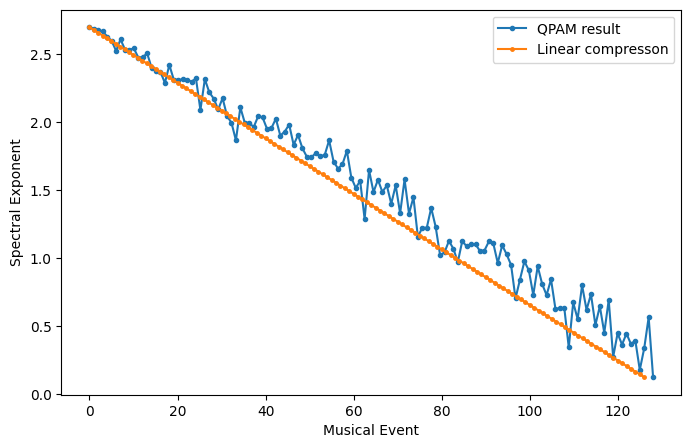

In [25]:
plt.figure(figsize=(8,5))

plt.plot(np.linspace(0, len(exponents), 128), exponents, '.-', label='QPAM result' )

qubit_size = 7
table_size = 2**qubit_size
t = np.linspace(0.01, 1-1/table_size, table_size)
plt.plot(np.arange(0,127,1), np.linspace(2.7,0.125,127), '.-', ms=5, label='Linear compresson')
plt.legend()
plt.ylabel('Spectral Exponent')
plt.xlabel('Musical Event')

#plt.savefig('plot2.png', dpi=1000)
plt.show()

# Quantum Bass

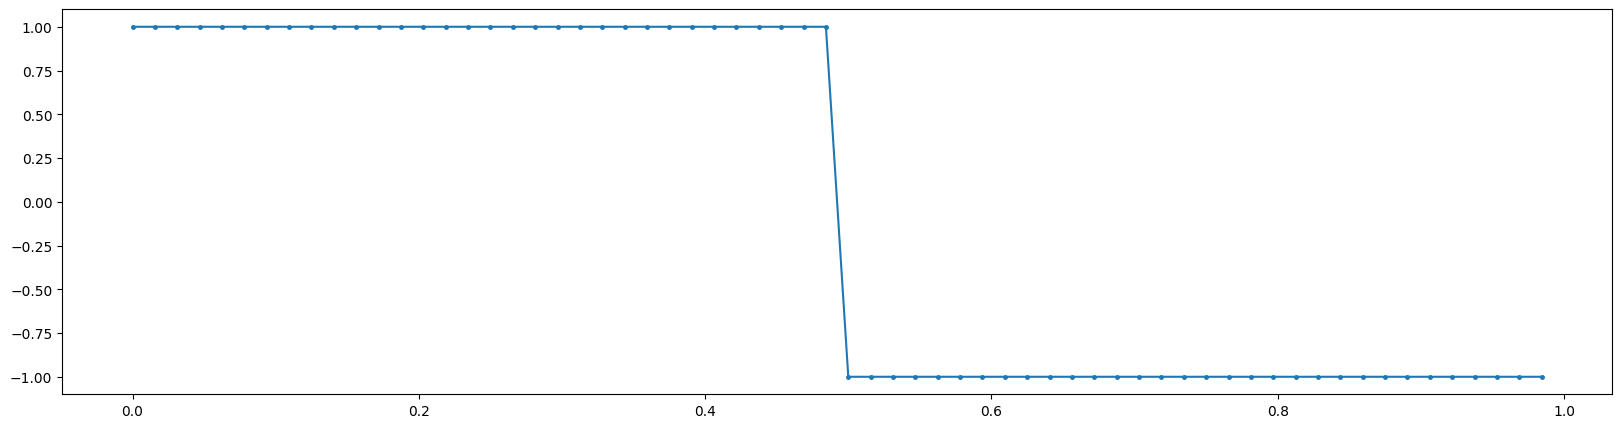

In [30]:
# Audio Sample / Table
qubit_size = 6
table_size = 2**qubit_size
t = np.linspace(0, 1-1/table_size, table_size)
sqrwave = sp.signal.square(2*np.pi*t, duty=0.5)
plt.figure(figsize=(20,5))
plt.plot(t, sqrwave, '.-', ms=5)
plt.show()

In [31]:
qsqr = qa.QuantumAudio('sqpam').load_input(sqrwave)

For this input, the SQPAM representation will require:
         6 qubits for encoding time information and 
         1 qubits for encoding ampĺitude information.


In [32]:
qsqr.prepare().measure()
#qsqr.circuit.draw('mpl')

QuantumAudio

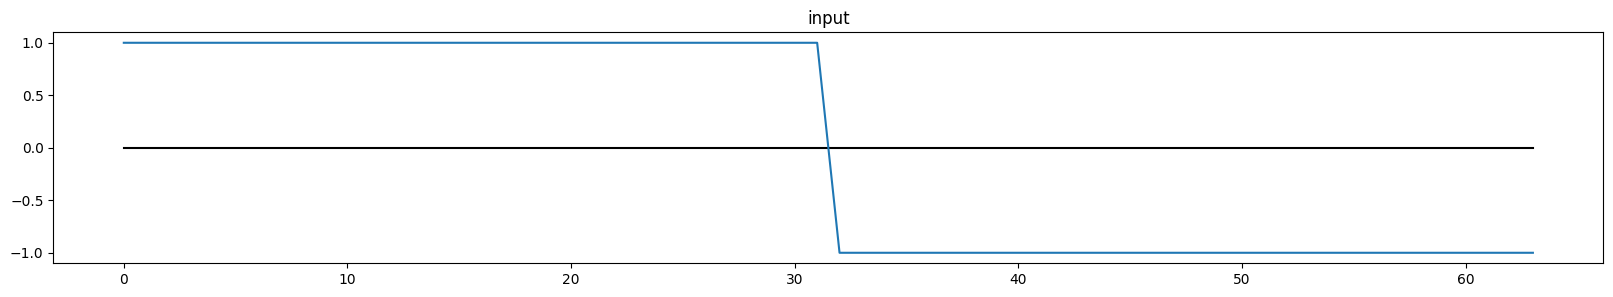

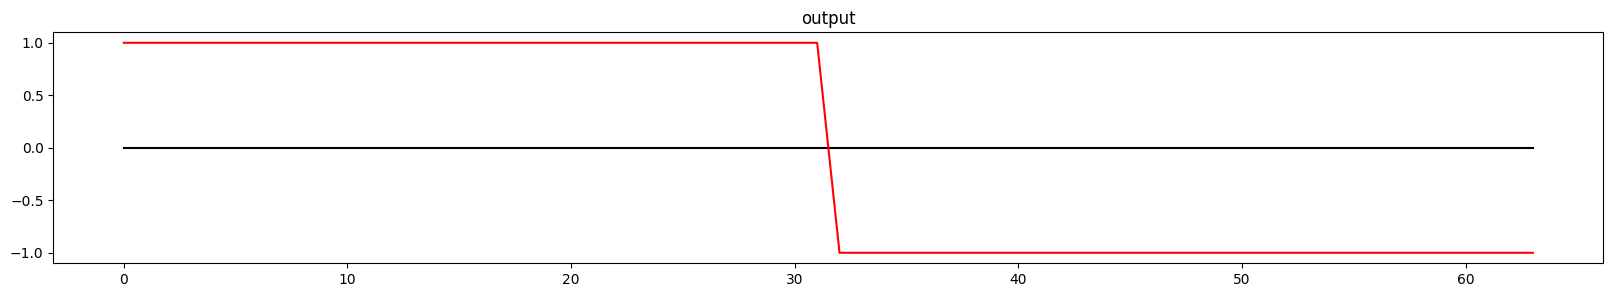

In [33]:
shots = 1024**2 # First result should be ideal, then using R gates, the signal will be distorted
qsqr_out = qsqr.run(shots).reconstruct_audio().output # output as array
qsqr.plot_audio()

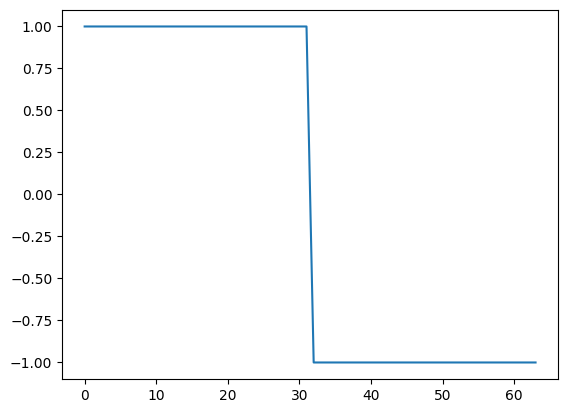

In [36]:
sqr_wave = qsqr.reconstruct_audio().output
plt.plot(np.arange(len(sqr_wave)), sqr_wave)

# SuperCollider

In [ ]:
server = Server()

In [ ]:
e = Buffer.alloc(server, 2*len(sqr_wave))

In [ ]:
sqr_synth = Synth(server, "qTable", {"buf" : e, "freq" : 110, "gain":0.2, "lp": 300})

In [ ]:
sqr_synth.free()

In [ ]:
# This loop is used for finding different bass sound timbre
# The add_r_sqpam can be changed to add_ry_sqpam or add_rx_sqpam too

for i in [x*pi/10 for x in range(11)]:
    out = add_r_sqpam(qsqr, i, i)
    updateBuffer(e, out)
    plot_out(out)

updateBuffer(e, sqr_wave)

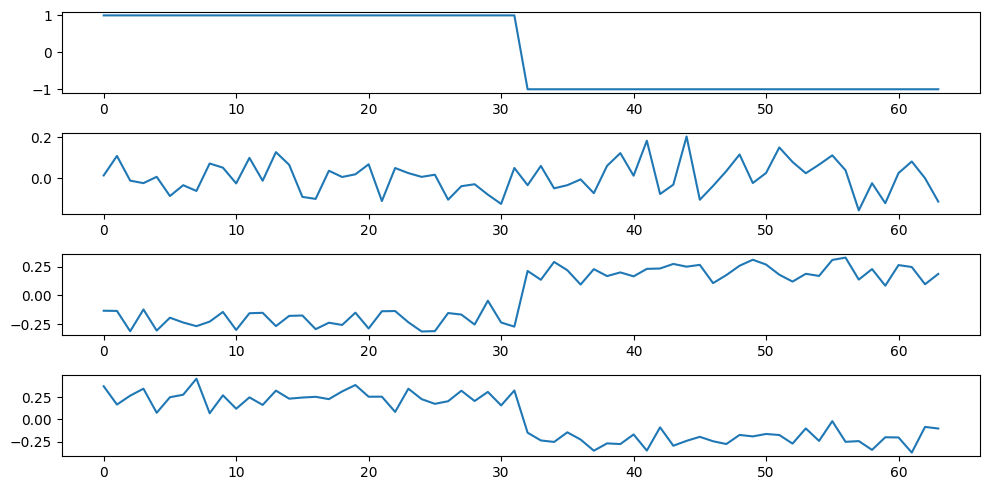

In [43]:
# These results are used for the composition

# rx gate pi/2
sqr_wave_2 =[ 0.01333333,  0.10810811, -0.01190476, -0.02409639,  0.00671141,
       -0.0867052 , -0.03409091, -0.06206897,  0.07142857,  0.05109489,
       -0.02531646,  0.09876543, -0.01234568,  0.12658228,  0.06508876,
       -0.09090909, -0.10067114,  0.03614458,  0.00584795,  0.01886792,
        0.06756757, -0.11111111,  0.04938272,  0.02469136,  0.00636943,
        0.01694915, -0.10447761, -0.03896104, -0.02941176, -0.08      ,
       -0.125     ,  0.04964539, -0.03401361,  0.05960265, -0.04938272,
       -0.03401361, -0.00584795, -0.07284768,  0.06024096,  0.12195122,
        0.01204819,  0.18232044, -0.07692308, -0.03144654,  0.2027027 ,
       -0.1048951 , -0.0375    ,  0.03448276,  0.11515152, -0.02352941,
        0.02531646,  0.14942529,  0.07878788,  0.02409639,  0.06578947,
        0.11111111,  0.03846154, -0.15646259, -0.02439024, -0.12162162,
        0.025     ,  0.08108108,  0.        , -0.11377246]

## rx 4pi/7
sqr_wave_3 = [-0.13414634, -0.13580247, -0.31325301, -0.12328767, -0.30718954,
       -0.19496855, -0.23684211, -0.26865672, -0.22905028, -0.14473684,
       -0.30177515, -0.15606936, -0.15231788, -0.26829268, -0.17919075,
       -0.17575758, -0.29496403, -0.23870968, -0.25827815, -0.15116279,
       -0.28915663, -0.13868613, -0.1369863 , -0.23489933, -0.31506849,
       -0.31210191, -0.15436242, -0.16778523, -0.25443787, -0.04697987,
       -0.23684211, -0.27272727,  0.2125    ,  0.13580247,  0.29142857,
        0.21893491,  0.09411765,  0.22857143,  0.168     ,  0.2       ,
        0.16556291,  0.23076923,  0.23404255,  0.2739726 ,  0.25      ,
        0.26582278,  0.10666667,  0.17647059,  0.25827815,  0.31034483,
        0.26857143,  0.18012422,  0.12      ,  0.18787879,  0.16923077,
        0.30864198,  0.32911392,  0.1375    ,  0.22891566,  0.08433735,
        0.26388889,  0.24705882,  0.09677419,  0.18666667]

# r 3pi/7, pi/2
sqr_wave_4 = [ 0.37333333,  0.16778523,  0.26760563,  0.34615385,  0.07514451,
        0.25      ,  0.27819549,  0.45833333,  0.07006369,  0.2716763 ,
        0.12056738,  0.24832215,  0.16339869,  0.32432432,  0.23376623,
        0.24657534,  0.25465839,  0.22875817,  0.31543624,  0.3875    ,
        0.25581395,  0.25609756,  0.08496732,  0.34591195,  0.22857143,
        0.17567568,  0.20512821,  0.32330827,  0.20754717,  0.30985915,
        0.15789474,  0.3255814 , -0.14893617, -0.23611111, -0.25287356,
       -0.14465409, -0.22580645, -0.35135135, -0.26896552, -0.27683616,
       -0.16883117, -0.35      , -0.08860759, -0.29559748, -0.24050633,
       -0.19526627, -0.24503311, -0.27631579, -0.17419355, -0.19047619,
       -0.16312057, -0.17482517, -0.27152318, -0.10067114, -0.24137931,
       -0.01910828, -0.2516129 , -0.24324324, -0.34210526, -0.2       ,
       -0.20245399, -0.37254902, -0.08387097, -0.10179641]

sqrwaves = [sqr_wave, sqr_wave_2, sqr_wave_3, sqr_wave_4]

fig, ax = plt.subplots(4,1, figsize=(10,5))
for id, waves in enumerate(sqrwaves):
    ax.flat[id].plot(np.arange(0, len(waves)), waves)

plt.tight_layout()